In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import cdist
import pulp

In [2]:
% matplotlib inline

# Image Clustering

In [3]:
img_one = mpimg.imread('dog.jpg')
img_two = mpimg.imread('dog_two.jpg')

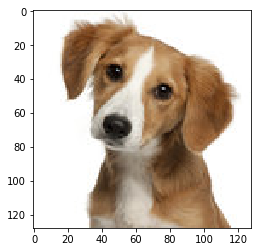

In [4]:
plt.imshow(img_one)

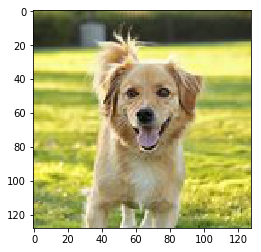

In [5]:
plt.imshow(img_two)

In [6]:
print img_one.shape
print img_two.shape

(128, 128, 3)
(128, 128, 3)


## reshape the data into a shape of (r_value, g_value, b_value)* 3

In [7]:
def shaping(img):
    img = img.reshape(3,128,128)
    processed = []
    for channel in img:
        processed.append(channel.flatten())
    return np.array(processed).T

Find signature of the two images

In [8]:
def gen_signature(processed, kmeans_result, original_center = True):
    n = kmeans_result.cluster_centers_.shape[0]
    signature_m = np.empty(processed_one.shape)
    signature_w = np.empty((n,1))
    
    # calculate mean either using the kmeans result or using mean
    if original_center:
        signature_m = kmeans_result.cluster_centers_
    # else: ...    
    
    # calculate weight
    for index in range(n):
        weight = len(processed[kmeans_result.labels_ == index])
        signature_w[index] = weight
    return [signature_m, signature_w]

In [9]:
n = 20
processed_one = shaping(img_one)
kmeans_one = KMeans(n_clusters= n, random_state=1).fit(processed_one)

In [10]:
n = 10
processed_two = shaping(img_two)
kmeans_two = KMeans(n_clusters= n, random_state=1).fit(processed_two)

In [13]:
signature_one = gen_signature(processed_one, kmeans_one, original_center=True)
signature_two = gen_signature(processed_two, kmeans_two, original_center= True)

## reprint the clustered image

In [11]:
img_one_clustered = np.copy(processed_one)
for i in range(20):
    indexes = np.where(kmeans_one.labels_ == i)
    img_one_clustered[indexes[0]] = kmeans_one.cluster_centers_[i]
#kmeans_one.cluster_centers_

In [12]:
def deshaping(processed):
    deshaped_image = np.empty((128,128,3))
    for channel in range(3):
        deshaped_image[:,:,channel] = processed[:,channel].reshape(128,128)
    return deshaped_image

In [13]:
clustered_img_one = deshaping(img_one_clustered)

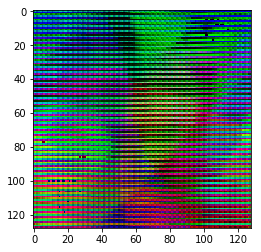

In [15]:
plt.imshow(clustered_img_one)
plt.show()

## normalize m values in signatures

In [14]:
def normalization(signature):
    m = signature[0]
    m = m/np.sum(m, axis = 0)
    return m

In [15]:
norm_signature_one = normalization(signature_one)
norm_signature_two = normalization(signature_two)

# Distance Calculation/Transportation Problem

In [16]:
norm_signature_one

array([[ 0.01963268,  0.0748526 ,  0.02942338],
       [ 0.07314671,  0.01583027,  0.04561416],
       [ 0.07336112,  0.06709329,  0.0746223 ],
       [ 0.02123633,  0.04339159,  0.07098246],
       [ 0.04607145,  0.07470086,  0.01964412],
       [ 0.07336777,  0.03928247,  0.04169332],
       [ 0.03172843,  0.07373065,  0.07353293],
       [ 0.07363011,  0.04236322,  0.07441601],
       [ 0.07282533,  0.03778708,  0.01895099],
       [ 0.03686   ,  0.07545168,  0.04336809],
       [ 0.07310903,  0.01866848,  0.07420795],
       [ 0.0323481 ,  0.01906898,  0.04317455],
       [ 0.03292848,  0.01433703,  0.07193991],
       [ 0.06550055,  0.07524664,  0.04064482],
       [ 0.07310835,  0.01967902,  0.02769224],
       [ 0.01562694,  0.07522145,  0.05158534],
       [ 0.05279666,  0.07421169,  0.07372131],
       [ 0.04558385,  0.0464473 ,  0.07451527],
       [ 0.01828242,  0.03804796,  0.03296327],
       [ 0.06885571,  0.07458772,  0.01730756]])

In [17]:
norm_signature_two

array([[ 0.03825655,  0.10087171,  0.12908314],
       [ 0.1003725 ,  0.06996172,  0.11351642],
       [ 0.17184867,  0.06770097,  0.07412714],
       [ 0.04840904,  0.14549368,  0.12742576],
       [ 0.04435911,  0.11207054,  0.05489194],
       [ 0.09311524,  0.13312948,  0.07901526],
       [ 0.1642005 ,  0.05507996,  0.12704494],
       [ 0.04469702,  0.04735134,  0.12198374],
       [ 0.13142911,  0.13335544,  0.12082323],
       [ 0.16331227,  0.13498517,  0.05208842]])

In [18]:
def cost(s_one, s_two):
    return cdist(s_one, s_two)

In [19]:
cost_list = cost(norm_signature_one, norm_signature_two)